# K-Means - California Housing Dataset

In [1]:
from sklearn.datasets import fetch_california_housing
import numpy as np
from numpy.random import default_rng
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

# To plot pretty figures
%matplotlib inline
mpl.rc('axes', labelsize=18)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

dataset  = fetch_california_housing(as_frame = True)

In [2]:
X = dataset.data
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


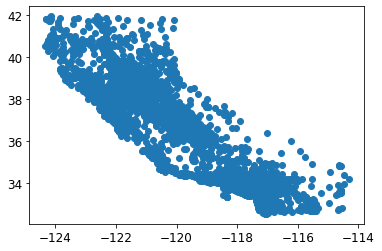

In [3]:
plt.scatter(X['Longitude'],X['Latitude'])

In [4]:
X = X.loc[:, ["MedInc", "Latitude", "Longitude"]]          # MedInc is measured in tens of thousands of US Dollars
X.head()                            

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


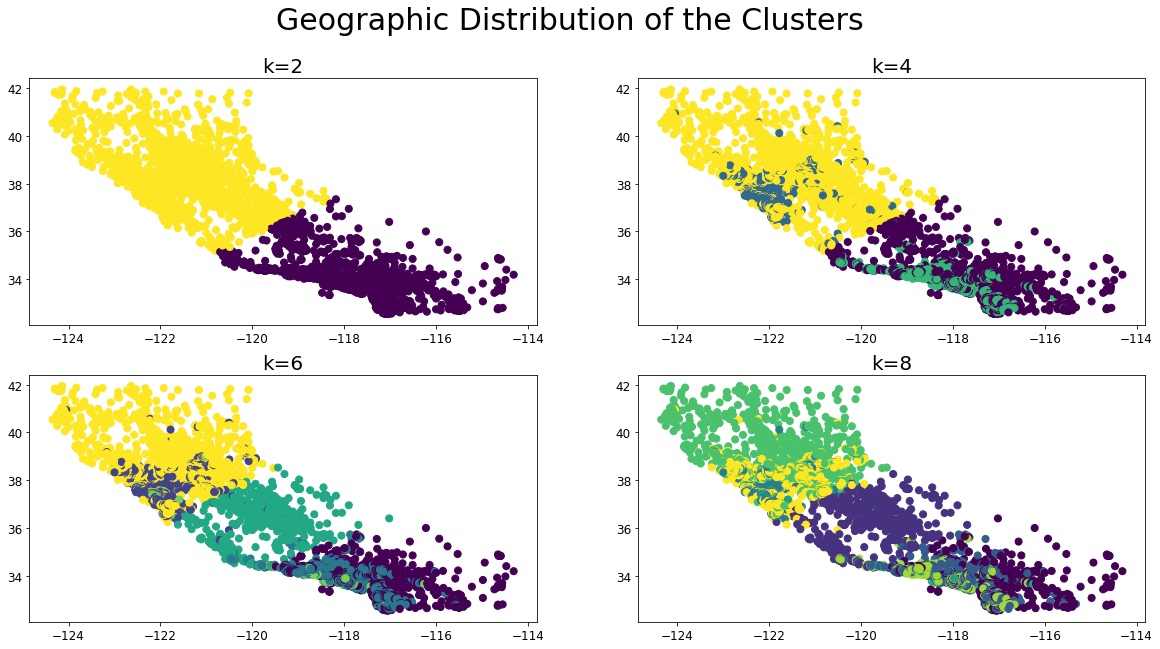

In [5]:
from sklearn.cluster import KMeans
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize =(20,10));

figure.suptitle('Geographic Distribution of the Clusters', size=30);

labels = KMeans(2, random_state=0).fit_predict(X)
ax1.scatter(X["Longitude"], X["Latitude"], c=labels,
            s=50, cmap='viridis');
ax1.set_title("k=2", size=20)

labels = KMeans(4, random_state=0).fit_predict(X)
ax2.scatter(X["Longitude"], X["Latitude"], c=labels,
            s=50, cmap='viridis');
ax2.set_title("k=4", size=20)

labels = KMeans(6, random_state=0).fit_predict(X)
ax3.scatter(X["Longitude"], X["Latitude"], c=labels,
            s=50, cmap='viridis');
ax3.set_title("k=6", size=20)

labels = KMeans(8, random_state=0).fit_predict(X)
ax4.scatter(X["Longitude"], X["Latitude"], c=labels,
            s=50, cmap='viridis')
ax4.set_title("k=8", size=20);


## K-Means - Inertia 

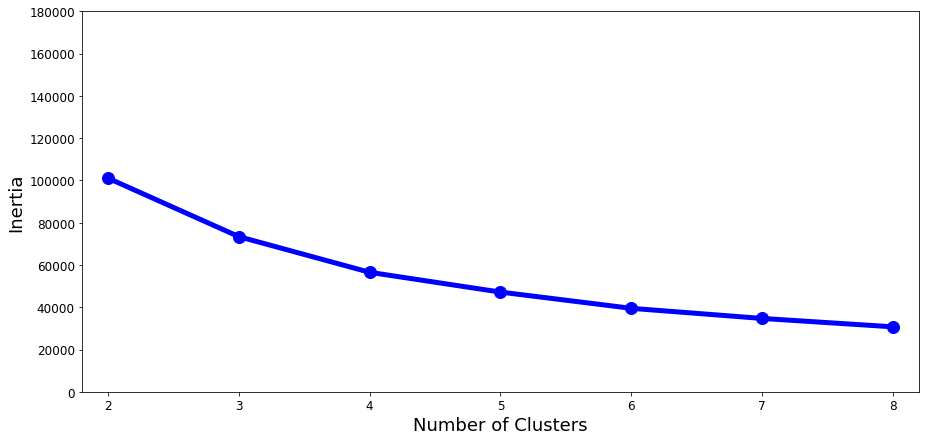

In [6]:
from sklearn.cluster import KMeans


max_cluster_sayisi = 8

all_experiments = []

for n_cluster in range(1,max_cluster_sayisi,1):
    kmeans = KMeans(n_clusters=n_cluster + 1, random_state=42)
    kmeans.fit(X)
    all_experiments.append(kmeans)
    
inertias = [experiment.inertia_ for experiment in all_experiments]
plt.figure(figsize=(15, 7))
plt.plot([2, 3, 4, 5, 6, 7, 8], inertias, 'bo-', linewidth=5, markersize=12)
plt.axis([1.8, 8.2, 0, 180000])
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

## Silhouette Score

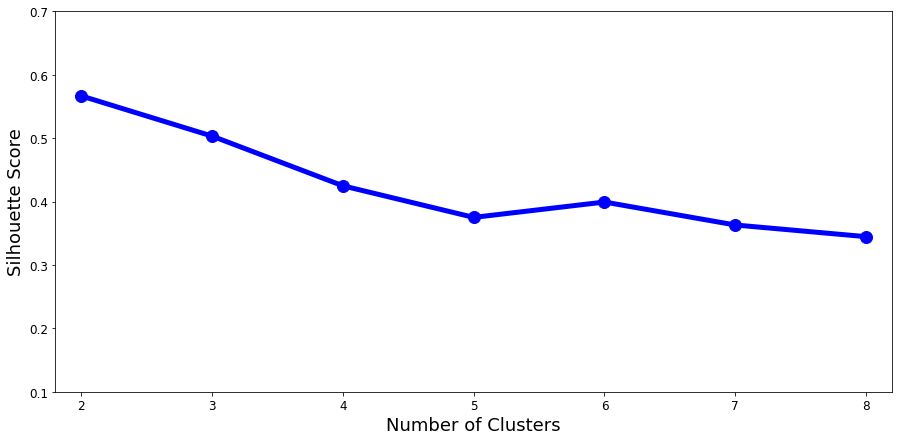

In [7]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X, experiment.labels_) for experiment in all_experiments]
plt.figure(figsize=(15, 7))
plt.plot([2, 3, 4, 5, 6, 7, 8], silhouette_scores, 'bo-', linewidth=5, markersize=12)
plt.axis([1.8, 8.2, 0.1, 0.7])
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

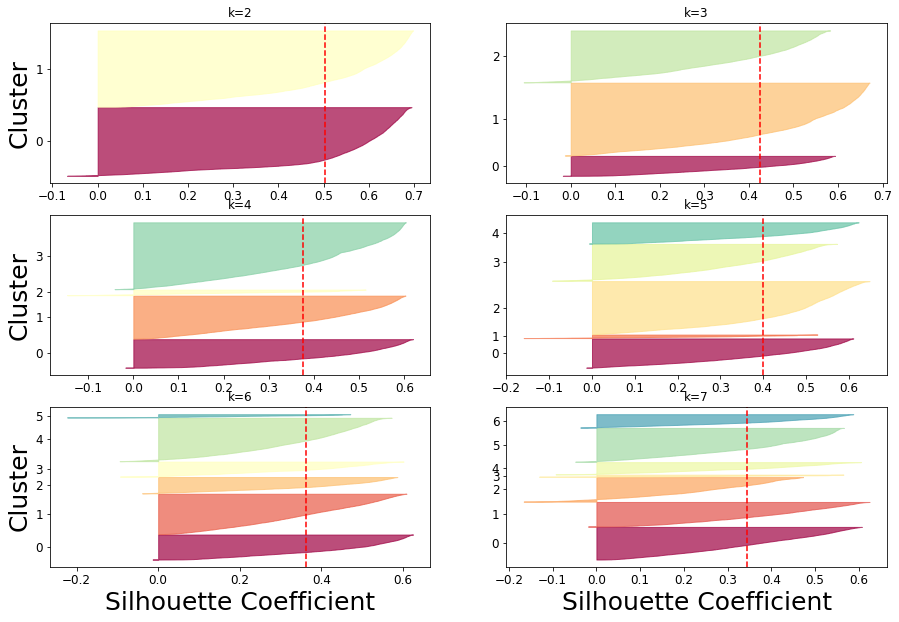

In [8]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
silhouette_coefficients = [silhouette_samples(X, experiment.labels_) for experiment in all_experiments]

plt.figure(figsize=(15,10))

for k in [2,3,4,5,6,7]:
    plt.subplot(3,2,k-1)
    padding = 50
    pos = padding
    ticks = []
    labels = all_experiments[k-1].labels_
    for i in range(k):

        coefficients = silhouette_coefficients[k-1][labels == i]
        coefficients.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coefficients)), 0, coefficients,
                          facecolor=color, edgecolor=color, alpha=0.7)
        tick = pos + len(coefficients) // 2
        ticks.append(tick)
        pos += len(coefficients) + padding

    if k in[2,4,6]:
        plt.ylabel("Cluster", fontsize = 25)


    if k in [6,7]:
        plt.xlabel("Silhouette Coefficient", fontsize = 25)

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    plt.title(f'k={k}')
    plt.axvline(x = silhouette_scores[k-1], color = 'red', linestyle = '--')

plt.show()